In [3]:
###Import###
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import ast
import pickle
import numpy as np

In [4]:
###Load results dataframe###
df = pd.read_csv('../results/barresi_results.csv')
df_predicted_ratios = df[df['Predicted Minor Producted'] == 1]

##Load model and X_test for calculaing AUC score##
major_anomer_predicter = pickle.load(open("../models/major_anomer_RF_simple.pickle", "rb"))
minor_anomer_predicter = pickle.load(open("../models/minor_anomer_RF_simple.pickle", "rb"))

def get_X_test(df):
    x = []
    for ind in df.index:
        x.append(np.concatenate([ast.literal_eval(df['donor_conf'][ind]),[df['temperature_C'][ind]],
                                        [df['donor_type_ohe_furanose'][ind]],[df['donor_type_ohe_pyranose'][ind]],[df['acceptor_type_ohe_N'][ind]],[df['acceptor_type_ohe_O'][ind]],[df['acceptor_type_ohe_S'][ind]],
                                        ast.literal_eval(df['lg_fp'][ind]),ast.literal_eval(df['c2_fp'][ind]),ast.literal_eval(df['solvent_fp'][ind]),ast.literal_eval(df['activator_fp'][ind])]))
    return x


In [6]:
####Analyze major anomer predictions###
y_true = df['Major True'].values
y_pred = df['Predicted Major Conf'].values
accuracy = accuracy_score(y_true[8:], y_pred[8:]) ###First 8 entries have a ratio of 1:1, hence, no true major anomer exist###
precision = precision_score(y_true[8:], y_pred[8:])
auc = roc_auc_score(y_true[8:],major_anomer_predicter.predict_proba(get_X_test(df[8:]))[:, 1])
print('Accuracy: 'f'{accuracy}')
print('Precesion: 'f'{precision}')
print('AUC: 'f'{auc}')

Accuracy: 0.6741405082212257
Precesion: 0.7995110024449877
AUC: 0.7244018536769485


In [7]:
###Analyze minor###
y_true = df['Minor True'].values
y_pred = df['Predicted Minor Producted'].values
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
auc = roc_auc_score(y_true,major_anomer_predicter.predict_proba(get_X_test(df))[:, 1])
print('Accuracy: 'f'{accuracy}')
print('Precesion: 'f'{precision}')
print('AUC: 'f'{auc}')

Accuracy: 0.7636632200886263
Precesion: 0.12
AUC: 0.23482984016089764


MAE:48.86473932071612
RMSE:2839.555966612784
R^2:-0.31142090166049674


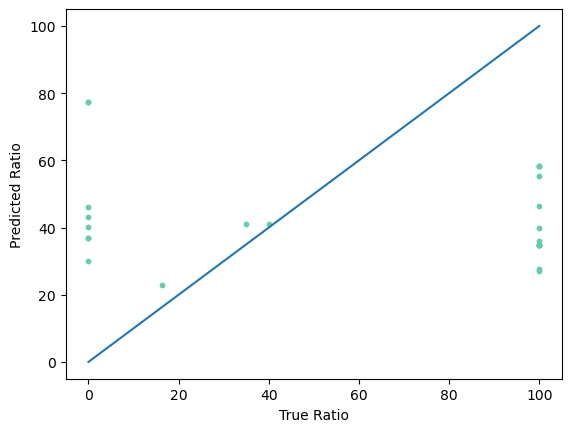

In [8]:
###Analyze ratio (only when a ratio is predicted) ###
y_pred = df_predicted_ratios['Predicted Ratio (%pos)'].values
y_true = df_predicted_ratios['Conf positive(%) True'].values
mae = mean_absolute_error(y_true,y_pred)
rmse = mean_squared_error(y_true,y_pred)
r2 = r2_score(y_true,y_pred)
print('MAE:'f'{mae}')
print('RMSE:'f'{rmse}')
print('R^2:'f'{r2}')

def plot_parity(y_true, y_pred,):
    plt.scatter(y_true, y_pred, color = 'mediumaquamarine', s = 10) 
    plt.plot( [0,100],[0,100] )
    plt.xlabel('True Ratio')
    plt.ylabel('Predicted Ratio')

plot_parity(y_true,y_pred)